In [7]:
import numpy as np
import matplotlib.pyplot as plt
from util import DataGenerator, DataPlotter
from sklearn.metrics import accuracy_score
np.random.seed(42)


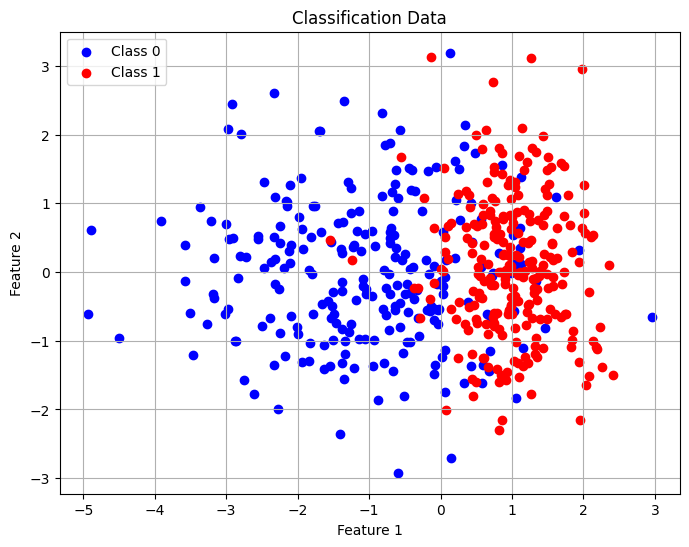

In [8]:
num_samples = 500
num_features = 5

type = "regression"
type = "classification"

if type == "classification":
    num_classes = 2

gen = DataGenerator(num_samples, num_features, num_classes)
X,y = gen.get_data(type=type)
initial = X.copy()

plotter = DataPlotter()
plotter.plot_data(X,y, type, num_classes)


In [9]:
num_samples, num_features = X.shape # X matrix
p = 2 # num of components
P = np.random.random((p,num_features)) # projection matrix

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X_scaled = (X - X_mean) / X_std
cov_matrix = np.cov(X_scaled, rowvar=False) # Covariance Matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

components = eigenvectors[0 : p]


In [11]:
def transform(X):
    X_ = (X - X_mean)
    return X_ @ components.T

transformed_X = transform(X)
print(X.shape, transformed_X.shape)


(500, 5) (500, 2)
